In [12]:
# !pip install pandas 
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn


     ---------------------------------------- 42.5/42.5 MB 7.0 MB/s eta 0:00:00


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import cufflinks as cf


ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
#!pip install plotly_express

In [ ]:
#!pip install cufflinks

In [13]:
df = pd.read_csv('food_order.csv')
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


# Clean Data


*   Check to see if there is any null values
*   Check for any missing values

*   Check for non-missing values
*   Remove any rows that contain at least one missing value


*   replace the infinity values with NaN in the original DataFrame
*   Convert the 'rating column' to a numeric data type. Any non-numeric values to NaN







In [14]:
incorrect_names = ['Big Wong Restaurant \x8c_¤¾Ñ¼', 'Empanada Mama (closed)', 'Chipotle Mexican Grill $1.99 Delivery', "Joe's Shanghai \x8e_À\x8eü£¾÷´", 'Dirty Bird To Go (archived)', 'CafÌ© China']
correct_names = ['Big Wong Restaurant', 'Empanada Mama', 'Chipotle Mexican Grill', "Joe's Shanghai", 'Dirty Bird To Go', 'Cafe China']

for num, name in enumerate(incorrect_names):
  curr_name = df[df['restaurant_name'] == name].index

  for val in curr_name:
    df.loc[val, 'restaurant_name'] = correct_names[num]

df['restaurant_name'] = df['restaurant_name'].apply(lambda name : name.strip().capitalize())

df['restaurant_name'].unique()

array(['Hangawi', 'Blue ribbon sushi izakaya', 'Cafe habana',
       'Blue ribbon fried chicken', 'Dirty bird to go',
       'Tamarind tribeca', 'The meatball shop', 'Barbounia',
       'Anjappar chettinad', 'Bukhara grill', 'Big wong restaurant',
       'Empanada mama', 'Pylos', "Lucky's famous burgers", 'Shake shack',
       'Sushi of gari', 'Redfarm hudson', 'Blue ribbon sushi',
       'Five guys burgers and fries', 'Tortaria', 'Cafe mogador',
       'Otto enoteca pizzeria', 'Vezzo thin crust pizza',
       'Sushi of gari 46', 'The kati roll company', 'Klong',
       '5 napkin burger', 'Tao', 'Parm', 'Sushi samba',
       'Haru gramercy park', 'Chipotle mexican grill', 'Redfarm broadway',
       'Cafeteria', 'Dumont burger', "Sarabeth's east",
       'Hill country fried chicken', 'Bistango', "Jack's wife freda",
       "Mamoun's falafel", 'Prosperity dumpling',
       'Blue ribbon sushi bar & grill', 'Westville hudson',
       'Blue ribbon brooklyn', 'Nobu next door', 'Osteria morin

**remove all data where the rating was Not given and check for any null values**

In [15]:
#df = df[df.rating != 'Not given']
#df
df.isnull()
df.isna().sum()
df.notna().sum()
df.dropna()
df[df.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]
df['rating'] = pd.to_numeric(df['rating'], errors='coerce') #This will make sure that the 'rating' column only contains numeric values and will raise an exception if any non-numeric value is present. 
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue ribbon sushi izakaya,Japanese,12.08,Weekend,NaN,25,23
2,1477070,66393,Cafe habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,106968,Blue ribbon fried chicken,American,29.20,Weekend,3.0,25,15
4,1478249,76942,Dirty bird to go,American,11.59,Weekday,4.0,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle mexican grill,Mexican,22.31,Weekend,5.0,31,17
1894,1477421,397537,The smile,American,12.18,Weekend,5.0,31,19
1895,1477819,35309,Blue ribbon sushi,Japanese,25.22,Weekday,NaN,31,24
1896,1477513,64151,Jack's wife freda,Mediterranean,12.18,Weekday,5.0,23,31


In [ ]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


# **Find the average rating and cost base off the cuisine_type**
*    Add a column that combines the food preparation time and devliver time for a total_wait_time
*   How to see which customer order from which restaurant



**What did you learn?**
*   *Spanish has the highest rating*
*   *The avg cost for all cuisine looks to be about $16* 



**Add a column that combines the food preparation time and devliver time for a total_wait_time**

In [ ]:
df['Total_Wait_Time']= df['food_preparation_time'] + df['delivery_time'] 
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Total_Wait_Time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,45
1,1477685,358141,Blue ribbon sushi izakaya,Japanese,12.08,Weekend,NaN,25,23,48
2,1477070,66393,Cafe habana,Mexican,12.23,Weekday,5.0,23,28,51
3,1477334,106968,Blue ribbon fried chicken,American,29.20,Weekend,3.0,25,15,40
4,1478249,76942,Dirty bird to go,American,11.59,Weekday,4.0,25,24,49
...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle mexican grill,Mexican,22.31,Weekend,5.0,31,17,48
1894,1477421,397537,The smile,American,12.18,Weekend,5.0,31,19,50
1895,1477819,35309,Blue ribbon sushi,Japanese,25.22,Weekday,NaN,31,24,55
1896,1477513,64151,Jack's wife freda,Mediterranean,12.18,Weekday,5.0,23,31,54


**A table that groups all cuisine_type and the avg rating and cost for each cuisine_type**







In [ ]:
mean_ratings_and_cost = df.groupby('cuisine_type').agg({'rating': lambda x: round(x.mean(), 2), 'cost_of_the_order': lambda x: round(x.mean(), 2), 'Total_Wait_Time': lambda x: round(x.mean(), 2)})
mean_ratings_and_cost.sort_values(by='rating', ascending=False, inplace=True)
mean_ratings_and_cost


,rating,cost_of_the_order,Total_Wait_Time
cuisine_type,,,
Spanish,4.83,18.99,50.33
Thai,4.67,19.21,50.47
Indian,4.54,16.92,51.19
Mexican,4.42,16.93,51.12
Japanese,4.37,16.30,51.64
Italian,4.36,16.42,52.05
Chinese,4.34,16.31,51.37
Southern,4.31,19.30,51.41
American,4.30,16.32,51.63


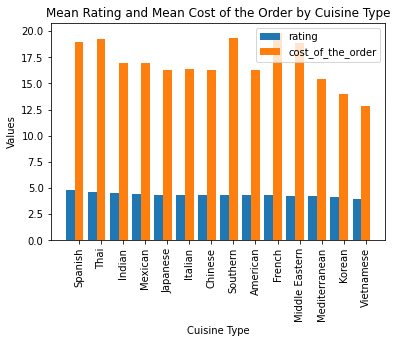

In [ ]:
barWidth = 0.4
bar1 = np.arange(len(mean_ratings_and_cost))
bar2 = [x + barWidth for x in bar1]
plt.bar(bar1, mean_ratings_and_cost['rating'], width=barWidth, label='rating')
plt.bar(bar2, mean_ratings_and_cost['cost_of_the_order'], width=barWidth, label='cost_of_the_order')
plt.xlabel('Cuisine Type')
plt.ylabel('Values')
plt.title('Mean Rating and Mean Cost of the Order by Cuisine Type')
plt.xticks(bar2, mean_ratings_and_cost.index)
plt.gca().set_xticklabels(mean_ratings_and_cost.index, rotation=90)
plt.legend()
plt.show()

# **How to see how many times a customer placed an order**


*   Customer 47440 ordered a lot mainly on the weekends and at a American cuisine type restaurants



**How to see which customer order from which restaurant**


In [ ]:
order_counts = df.groupby(['restaurant_name', 'customer_id']).size().reset_index(name='order_counts')
order_counts.head()

,restaurant_name,customer_id,order_counts
0,'wichcraft,321492,1
1,12 Chairs,115610,1
2,12 Chairs,225912,1
3,12 Chairs,276192,1
4,12 Chairs,375098,1


**how to see how many times a particular customer ordered delivery** 

In [ ]:
customer_order_counts = df.groupby(['customer_id']).size().reset_index(name='order_counts')
customer_order_counts.sort_values(by='order_counts', ascending=False, inplace=True)
customer_order_counts

,customer_id,order_counts
116,52832,13
84,47440,10
333,83287,9
839,250494,8
216,65009,7
...,...,...
478,105903,1
479,105992,1
480,106006,1
481,106324,1


In [ ]:
customer_47440_orders = df[df['customer_id'] == 47440]
customer_47440_orders

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Total_Wait_Time
264,1477909,47440,Blue Ribbon Fried Chicken,American,12.18,Weekend,NaN,31,23,54
398,1478120,47440,Blue Ribbon Fried Chicken,American,8.10,Weekend,NaN,33,22,55
579,1477178,47440,Bareburger,American,24.20,Weekend,4.0,23,23,46
674,1476982,47440,Bareburger,American,8.73,Weekend,5.0,21,19,40
778,1477481,47440,Bareburger,American,25.22,Weekday,3.0,31,27,58
807,1477594,47440,Bareburger,American,12.18,Weekday,3.0,25,24,49
824,1476854,47440,Blue Ribbon Fried Chicken,American,6.45,Weekend,4.0,30,24,54
1306,1476559,47440,Bareburger,American,15.57,Weekday,4.0,24,28,52
1359,1477903,47440,Bareburger,American,16.25,Weekend,NaN,32,28,60
1811,1477664,47440,Blue Ribbon Fried Chicken,American,29.30,Weekend,4.0,28,16,44


**Top 10 based off avgerage rating and order count**

In [ ]:
top_10_restaurant = df.groupby(['restaurant_name','cuisine_type'])['rating'].agg(['mean','count']).reset_index()
top_10_restaurant.rename(columns={'mean':'average_rating','count':'order_count'}, inplace=True)
top_10_restaurant = top_10_restaurant.query('order_count > 1').sort_values(by=['average_rating','order_count'], ascending=[False,False]).head(10)
top_10_restaurant



,restaurant_name,cuisine_type,average_rating,order_count
162,Vanessa's Dumpling House,Chinese,5.0,5
50,Dos Caminos,Mexican,5.0,4
172,Yama 49,Japanese,5.0,4
49,Donburi-ya,Japanese,5.0,3
82,Junoon,Indian,5.0,3
133,Saravanaa Bhavan,Indian,5.0,3
8,Asuka Sushi,Japanese,5.0,2
16,Big Daddy's,American,5.0,2
26,Bukhara Grill,Indian,5.0,2
34,Carmine's,Italian,5.0,2


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



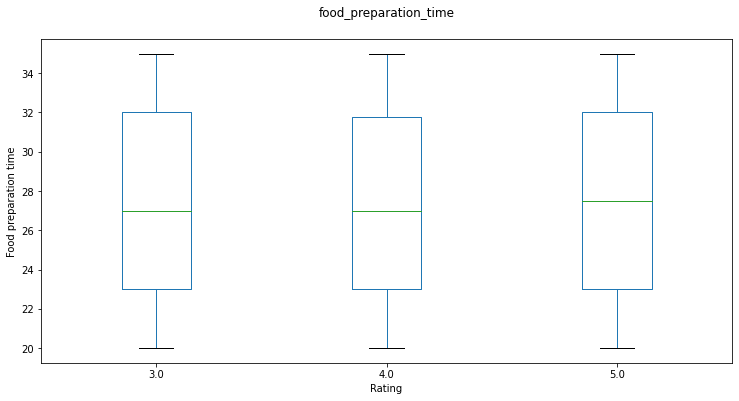

In [ ]:
fastest_food_prep = df.groupby(['restaurant_name'])['food_preparation_time'].min().reset_index(name='fastest_food_prep')
#result = pd.merge(fastest_food_prep, df[['restaurant_name', 'rating']], on='restaurant_name', how='left')
result = pd.merge(fastest_food_prep, df[['restaurant_name', 'rating','food_preparation_time']], on='restaurant_name', how='left')
correlation = result['fastest_food_prep'].corr(result['rating'])
correlation
fig, ax = plt.subplots(figsize=(12, 6), nrows=1, ncols=1)
result.boxplot(column='food_preparation_time', by='rating', grid=False, ax=ax)
plt.xlabel('Rating')
plt.ylabel('Food preparation time')
plt.suptitle('')
ax.title.set_position([.5, 1.05])
plt.show()

In [ ]:
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Total_Wait_Time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,45
1,1477685,358141,Blue ribbon sushi izakaya,Japanese,12.08,Weekend,NaN,25,23,48
2,1477070,66393,Cafe habana,Mexican,12.23,Weekday,5.0,23,28,51
3,1477334,106968,Blue ribbon fried chicken,American,29.20,Weekend,3.0,25,15,40
4,1478249,76942,Dirty bird to go,American,11.59,Weekday,4.0,25,24,49
...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle mexican grill,Mexican,22.31,Weekend,5.0,31,17,48
1894,1477421,397537,The smile,American,12.18,Weekend,5.0,31,19,50
1895,1477819,35309,Blue ribbon sushi,Japanese,25.22,Weekday,NaN,31,24,55
1896,1477513,64151,Jack's wife freda,Mediterranean,12.18,Weekday,5.0,23,31,54


# **If I was opening up a restaurant, how can I use the data given to find...**

*   what type of restaurant recieves the most orders 
*   when should I staff up the restaurant (weekday or weekend)

*   What are the avg cost & avg total time to get food delivered 
*   Top 10 restaurants





**A breakdown of which restaurant recieves the most orders base off Cuisine Type**


*   American Cuisine had the most orders with 584 (30.8%)
*   The second popular cusisine is Japanese with 470 orders (24.8%)



In [ ]:
import plotly.express as px

grouped_df = df.groupby('cuisine_type').size().reset_index(name='num_orders')
fig = px.pie(grouped_df, values='num_orders', names='cuisine_type', 
             title='Number of Orders by Cuisine Type')

fig.show()

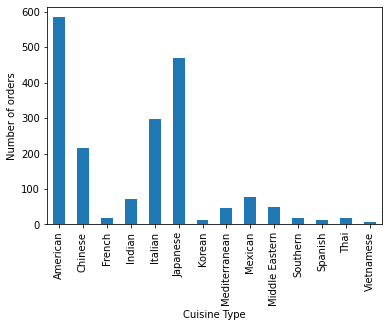

In [ ]:
order_counts = df.groupby(['cuisine_type']).size().reset_index(name='order_counts')
order_counts.plot(kind='bar', x='cuisine_type', y='order_counts', legend=False)
plt.xlabel('Cuisine Type')
plt.ylabel('Number of orders')
plt.show()

In [ ]:
cuisine_order_count = df.groupby(['cuisine_type']).size().reset_index(name='total_orders')
cuisine_order_count

,cuisine_type,total_orders
0,American,584
1,Chinese,215
2,French,18
3,Indian,73
4,Italian,298
5,Japanese,470
6,Korean,13
7,Mediterranean,46
8,Mexican,77
9,Middle Eastern,49


**See how many times a restaurant recieved an order on the weekday or weekend, the total orders for each and a visualization of it**

In [ ]:
day_of_the_week = df.groupby(['restaurant_name','day_of_the_week']).size().reset_index(name='order_counts')
day_of_the_week

,restaurant_name,day_of_the_week,order_counts
0,'wichcraft,Weekday,1
1,12 chairs,Weekday,2
2,12 chairs,Weekend,2
3,5 napkin burger,Weekday,2
4,5 napkin burger,Weekend,3
...,...,...,...
274,Yama 49,Weekend,3
275,Yama japanese restaurant,Weekday,4
276,Yama japanese restaurant,Weekend,14
277,Zero otto nove,Weekday,1


In [ ]:
day_of_the_week_count = df.groupby(['day_of_the_week']).size().reset_index(name='order_counts')
day_of_the_week_count

,day_of_the_week,order_counts
0,Weekday,547
1,Weekend,1351


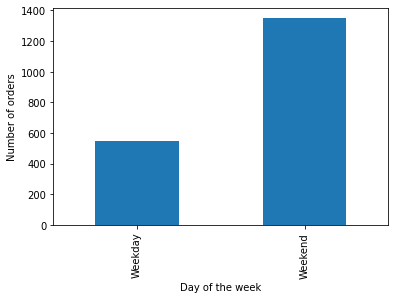

In [ ]:
day_of_the_week_count.plot(kind='bar', x='day_of_the_week', y='order_counts', legend=False)
plt.xlabel('Day of the week')
plt.ylabel('Number of orders')
plt.show()

**See The Top 10 restaurants and their cuisine type**

In [ ]:
top_10_restaurants = df.groupby(['restaurant_name', 'cuisine_type']).size().sort_values(ascending=False).head(10)
top_10_restaurants

restaurant_name                cuisine_type
Shake shack                    American        219
Blue ribbon sushi              Japanese        119
The meatball shop              Italian         112
Blue ribbon fried chicken      American         96
Parm                           Italian          68
Redfarm broadway               Chinese          59
Redfarm hudson                 Chinese          55
Tao                            Japanese         49
Han dynasty                    Chinese          46
Blue ribbon sushi bar & grill  Japanese         44
dtype: int64

In [ ]:
top_10_restaurants = top_10_restaurants.to_frame()
top_10_restaurants.style.set_table_styles([{'selector': 'th', 'props': [('border-bottom', '4px solid black')]},
                                      {'selector': 'td', 'props': [('border', '1px solid black')]}])

,,0
restaurant_name,cuisine_type,
Shake shack,American,219
Blue ribbon sushi,Japanese,119
The meatball shop,Italian,112
Blue ribbon fried chicken,American,96
Parm,Italian,68
Redfarm broadway,Chinese,59
Redfarm hudson,Chinese,55
Tao,Japanese,49
Han dynasty,Chinese,46


# **Find the average rating and cost base off the cuisine_type**
*    Add a column that combines the food preparation time and devliver time for a total_wait_time
*   How to see which customer order from which restaurant



**What did you learn?**
*   *Spanish has the highest rating*
*   *The avg cost for all cuisine looks to be about $16* 


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(x=mean_ratings_and_cost.index, y=mean_ratings_and_cost['rating'],
                     name='Mean Rating'))
fig.add_trace(go.Bar(x=mean_ratings_and_cost.index, y=mean_ratings_and_cost['cost_of_the_order'],
                     name='Mean Cost of Order'))

fig.update_layout(barmode='group', xaxis_title="Cuisine Type", yaxis_title="Avg Rating/Avg Cost",
                  title='Mean Rating and Mean Cost of the Order by Cuisine Type')
fig.show()

**A table that groups all cuisine_type and the avg rating and cost for each cuisine_type**

In [ ]:
mean_ratings_and_cost = df.groupby('cuisine_type').agg({'rating': lambda x: round(x.mean(), 2), 'cost_of_the_order': lambda x: round(x.mean(), 2), 'Total_Wait_Time': lambda x: round(x.mean(), 2)})
mean_ratings_and_cost.sort_values(by='rating', ascending=False, inplace=True)
mean_ratings_and_cost

,rating,cost_of_the_order,Total_Wait_Time
cuisine_type,,,
Spanish,4.83,18.99,50.33
Thai,4.67,19.21,50.47
Indian,4.54,16.92,51.19
Mexican,4.42,16.93,51.12
Japanese,4.37,16.30,51.64
Italian,4.36,16.42,52.05
Chinese,4.34,16.31,51.37
Southern,4.31,19.30,51.41
American,4.30,16.32,51.63
